<a href="https://colab.research.google.com/github/shcho11/00.ML_Projects_KoreaUniv_2022-1/blob/main/WordCloudPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 워드클라우드(WorldCloud) 실습 
- konlpy 패키지의 Okt Parser을 활용하여 기사원문에서 명사만을 추출하여 워드클라우드 시각화까지 실습해보기

In [1]:
!pip install konlpy 
from konlpy.tag import Okt 
from wordcloud import WordCloud 
from PIL import Image 
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
!ls -a

.  ..  .config	drive  sample_data  wc.png


In [4]:
file = open('drive/MyDrive/20221111_chosunilbo_opinion.txt')
reply_text = file.readlines()
file.close()
print(reply_text)

['[사설] 거품 빠지는 부동산·코인, 금융 위기 전이 막아야\n', '\n', '집값 하락 폭이 커지고 거래가 급감하자 정부가 서울과 성남·과천·하남·광명시만 남기고 부동산 규제 지역을 모두 푸는 대책을 내놨다. 규제 지역에서 풀리면 집값의 70%까지 주택 대출을 해주고 양도세·취득세 중과가 없어져 극심한 거래 절벽을 완화하는 데 도움 될 것이다. 올 들어 전국 주택 매매 건수가 지난해 같은 기간의 절반으로 줄었다. 서울 아파트가 179만가구에 달하는데 9월 매매 건수가 594건에 불과할 정도다. 사상 최저다. 집값 하락 속도도 점점 빨라지고 있다. 서울 강남권 아파트도 최고점 대비 30%가량 급락했다. 주택 매수 심리가 얼어붙으면서 미분양 물량이 급증하고 있다. 9월 말 기준 전국 미분양 주택은 한 달 전 대비 27% 급증했다. 1년 전보다는 세 배나 많다.\n', '\n', '미분양 물량이 쌓이면 건설사들이 자금 회수를 못해 경영난에 빠진다. 2008년 글로벌 금융 위기 당시 주택 가격 급락과 미분양 급증 탓에 100대 건설사 중 45사가 부도·법정관리 등 구조 조정에 들어갔고, 그 여파로 저축은행 30여 곳이 문을 닫았다. 현재도 금융회사들이 아파트 등 부동산 개발에 대준 프로젝트 파이낸싱(PF) 자금이 112조원에 달하고, 이 중 70조원은 증권사·캐피털사·보험사 등이 자금을 댔다. 부동산발 ‘돈맥경화’가 금융회사의 자금 경색으로 이어져 금융 불안을 고조하는 연쇄반응이 일어나고 있다.\n', '\n', '집값 거품은 빠져야 하지만, 급격한 하락은 금융 위기로 번질 위험이 있다. 집값의 점진적 하락을 유도할 연착륙 대책이 필요하다. 규제 지역 해제도 도움 되겠지만, 미분양 아파트에 대한 양도세 감면이나 문재인 정부가 줬다가 뺏은 주택 임대 사업자의 감세 혜택 등을 부활시켜 주택 수요를 진작하는 방안을 검토할 필요가 있다. 영끌족이 이자 부담을 견디지 못하고 집을 던지기 시작하면 집값 하락 폭이 더욱 커질 수 있다. 이들의 출구전략을 위해서도 주택 거래 

In [5]:
# 1) 불용어 제거를 하지 않은 버전 

okt = Okt()
text = ''
for sentence in reply_text : 
  for noun in okt.nouns(sentence) : 
    text += noun + ' '

print(text)

사설 거품 부동산 코인 금융 위기 전이 집값 하락 폭 거래 급감 정부 서울 성남 과천 하남 광명시 부동산 규제 지역 모두 대책 규제 지역 집값 주택 대출 도세 취득세 중과 거래 절벽 완화 데 도움 것 전국 주택 매매 건 수가 지난해 기간 절반 서울 아파트 달 매매 건 수가 건 정도 사상 최저 집값 하락 속도 점점 서울 강남 아파트 최고점 대비 가량 급락 주택 매수 심리 미분 물량 급증 말 기준 전국 미분 주택 달 전 대비 급증 전 세 배 미분 물량 건설 자금 회수 난 글로벌 금융 위기 당시 주택 가격 급락 미분 급증 탓 건설 사 중 사가 부도 법정관리 등 구조 조정 그 여파 저축은행 여 곳 문 현재 금융 회사 아파트 등 부동산 개발 대준 프로젝트 파이 낸싱 자금 달 이 중 증권사 캐피털 사 보험사 등 자금 부동산 발 돈맥 경화 금융 회사 자금 경색 금융 불안 고조 연쇄반응 일어나고 집값 거품 하락 금융 위기 번질 위험 집값 점진 하락 유도 착륙 대책 규제 지역 해제 도움 미분 아파트 대한 도세 문재인 정부 주택 임대 사업자 감세 혜택 등 부활 주택 수요 진작 방안 검토 필요 끌족 이자 부담 못 집 던지기 시작 집값 하락 폭 더욱 수 이 출구 전략 위 주택 거래 활성화 대책 가상 화폐 리스크 조짐 세계 위 가상 화폐 거래소 자금난 고객 예치 금 인 중단 글로벌 가상 화폐 시장 혼란 빠트렸다 이 여파 비트코인 더 리움 등 대표 가상 화폐 가격 폭락 크게 코인 광풍 시기 형성 거품 과정 볼 수 여기 투자 연기금 자산운용 사의 손실 그 파장 글로벌 금융시장 번질 가능성 배제 수 레고랜드 흥국생명 사태 요즘 금융시장 조그만 불씨 불길 일파 파 번 지기 십상 금융 당국 사태 상시 모니터링 국내 코인 거래소 재무 상태 다시 점검 필요 시장 불안 요소 상시 점검 위험 요소 사전 제거 선제 대응 체제 절실 


### 1)에서와 같이 불용어 제거를 하지 않은 결과, '데', '이', '그', '것', '전', '배' 등과 같은 목적상 불필요한 단어 요소들이 결과에 포함이 됨. 아래에서 이것들을 제거해 보자.

In [6]:
okt = Okt()
text1 = ''
for sentence in reply_text : 
  for noun in okt.nouns(sentence) : 
    if noun in ['데','이','그','것','건','전','사','배','등','중','못','수'] : 
      pass
    else : 
     text1 += noun + ' '

print(text1)

사설 거품 부동산 코인 금융 위기 전이 집값 하락 폭 거래 급감 정부 서울 성남 과천 하남 광명시 부동산 규제 지역 모두 대책 규제 지역 집값 주택 대출 도세 취득세 중과 거래 절벽 완화 도움 전국 주택 매매 수가 지난해 기간 절반 서울 아파트 달 매매 수가 정도 사상 최저 집값 하락 속도 점점 서울 강남 아파트 최고점 대비 가량 급락 주택 매수 심리 미분 물량 급증 말 기준 전국 미분 주택 달 대비 급증 세 미분 물량 건설 자금 회수 난 글로벌 금융 위기 당시 주택 가격 급락 미분 급증 탓 건설 사가 부도 법정관리 구조 조정 여파 저축은행 여 곳 문 현재 금융 회사 아파트 부동산 개발 대준 프로젝트 파이 낸싱 자금 달 증권사 캐피털 보험사 자금 부동산 발 돈맥 경화 금융 회사 자금 경색 금융 불안 고조 연쇄반응 일어나고 집값 거품 하락 금융 위기 번질 위험 집값 점진 하락 유도 착륙 대책 규제 지역 해제 도움 미분 아파트 대한 도세 문재인 정부 주택 임대 사업자 감세 혜택 부활 주택 수요 진작 방안 검토 필요 끌족 이자 부담 집 던지기 시작 집값 하락 폭 더욱 출구 전략 위 주택 거래 활성화 대책 가상 화폐 리스크 조짐 세계 위 가상 화폐 거래소 자금난 고객 예치 금 인 중단 글로벌 가상 화폐 시장 혼란 빠트렸다 여파 비트코인 더 리움 대표 가상 화폐 가격 폭락 크게 코인 광풍 시기 형성 거품 과정 볼 여기 투자 연기금 자산운용 사의 손실 파장 글로벌 금융시장 번질 가능성 배제 레고랜드 흥국생명 사태 요즘 금융시장 조그만 불씨 불길 일파 파 번 지기 십상 금융 당국 사태 상시 모니터링 국내 코인 거래소 재무 상태 다시 점검 필요 시장 불안 요소 상시 점검 위험 요소 사전 제거 선제 대응 체제 절실 


### 2) 에서와 같이 불용어 제거를 하고 난 후 한결 결과가 정제됨.

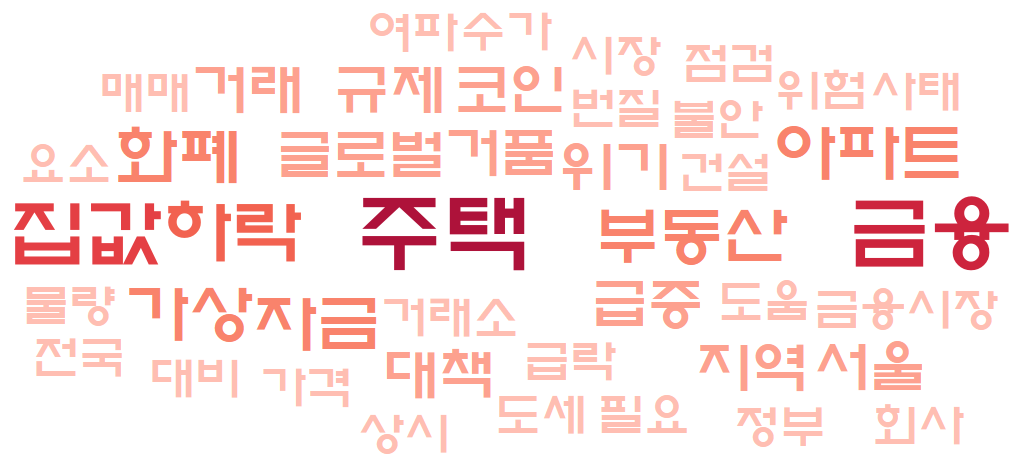

In [17]:
from PIL import Image 
mask_image = np.array(Image.open('drive/MyDrive/timerunningout.png'))

wc = WordCloud(background_color = 'white',
               font_path = 'drive/MyDrive/HMFMMUEX.TTC',
               max_words = 80,
               max_font_size = 80,
               min_font_size = 10,
               mask = mask_image,
               colormap = 'GnBu').generate(text1)
wc.to_file('wc.png')

In [18]:
!ls -a

.  ..  .config	drive  sample_data  wc.png


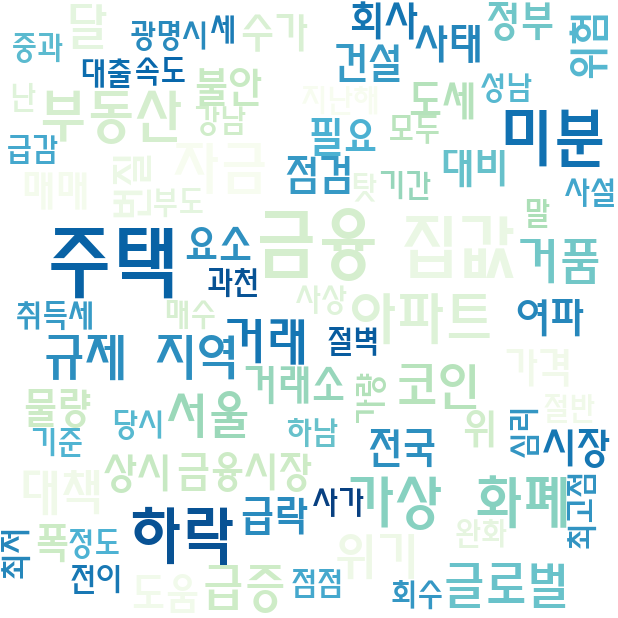

In [19]:
from IPython.display import Image
Image('wc.png')